In [2]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

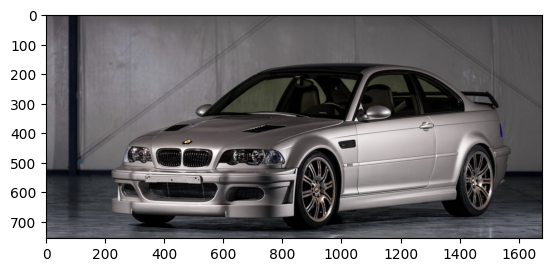

In [10]:
#Spcific colour on image
###################################################################################################################################
img = cv2.imread("car 1.jpg")
img.shape
plt.imshow(img)

In [6]:
img[:,:,-1].shape

(756, 1680)

In [12]:
#Red -> red_plane - gray
#Green -> green_plane - gray
#Blue -> Blue_plane - gray
#Cyan ->  gray - red_plane
#Magenta ->  gray - green_plane
#Yellow -> gray - blue_plane

#
#rbg to gray 
#0.6R+0.3G+0.1B

In [13]:
img2 = cv2.imread('img2.jpg')
img2.shape


(837, 1600, 3)

In [23]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
red_plane = img2[:,:,-1].copy()
green_plane = img2[:,:,-2].copy()
blue_plane = img2[:,:,-3].copy()

In [24]:
red_color = cv2.subtract(red_plane, gray)
green_color = cv2.subtract(green_plane, gray)
blue_color = cv2.subtract(blue_plane, gray)
yellow_color = cv2.subtract(gray, blue_plane)
magenta_color =cv2.subtract(gray , green_color)
cyan_color = cv2.subtract(gray , red_plane)

In [18]:
def imshow(im,title, type='', ):
    if type:
        plt.imshow(im, cmap =type)
    else:    
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')

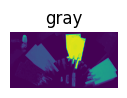

In [30]:
#plt.figure(figsize=(18,5))
# plt.subplot(2,4,1): imshow(img[:,:,::-1], 'original')
# plt.subplot(2,4,2): imshow(img[:,:,::-1], 'Gray','gray')
# plt.subplot(2,4,3): imshow(img[:,:,::-1], 'RP','gray')
# plt.subplot(2,4,4): imshow(img[:,:,::-1], 'GP','gray')
# plt.subplot(2,4,5): imshow(img[:,:,::-1], 'BP','gray')
# plt.subplot(2,4,6): imshow(img[:,:,::-1], 'BP','gray')
# plt.subplot(2,4,7): imshow(img[:,:,::-1], 'BP','gray')
# plt.subplot(2,4,8): imshow(img[:,:,::-1], 'BP','gray')
# plt.subplot(2,4,9): imshow(img[:,:,::-1], 'BP','gray')
# plt.subplot(2,4,10): imshow(img[:,:,::-1], 'BP','gray')
# plt.subplot(2,4,11): imshow(img[:,:,::-1], 'BP','gray')
plt.subplot(3,4,9); imshow(yellow_color, 'Yellow','gray')
plt.show()


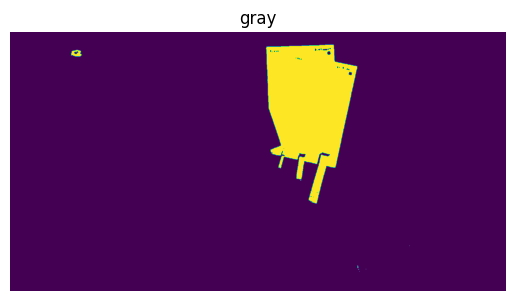

In [38]:
th, y_bw = cv2.threshold(yellow_color, 140, 255, cv2.THRESH_BINARY)
imshow(y_bw,'bin','gray')

In [35]:
ski.measure.regionprops
rp = ski.measure.regionprops(y_bw)

In [36]:
rp0 = rp[0]
y1,x1,y2,x2 = rp0.bbox

In [41]:
img_cropped = img2[y1:y2, x1:x2,:].copy()
imshow(img_cropped[:,:,::-1], 'cropped')

TypeError: imshow() missing 1 required positional argument: 'title'

In [40]:
img_copy = img.copy()
cv2.rectangle(img_copy, (x1,y1), (x2,y2), color=[0,0,255], thickness=5)
imshow(img_copy[:,:,::-1],'')

TypeError: imshow() missing 1 required positional argument: 'title'